In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", as_frame=False)

In [2]:
mnist.target = mnist.target.astype(np.int8)

In [3]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array([5, 0, 4, ..., 4, 5, 6], dtype=int8),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel

In [4]:
np.unique(mnist['target'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [5]:
X, y = mnist['data'], mnist["target"]

In [6]:
import matplotlib
import matplotlib.pyplot as plt

In [7]:
y[40]

1

In [8]:
dig = X[40]

In [9]:
dig_ = dig.reshape(28,28)

In [10]:
dig_.shape

(28, 28)

(-0.5, 27.5, 27.5, -0.5)

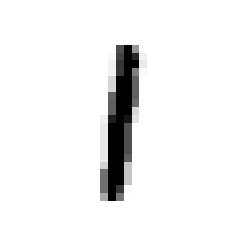

In [11]:
plt.imshow(dig_, cmap = matplotlib.cm.binary)
plt.axis('off')

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [13]:
shuffling_index = np.random.permutation(60000)

In [14]:
X_train, y_train = X_train[shuffling_index], y_train[shuffling_index]

In [15]:
y_train_6 = y_train == 6 
y_test_6 = y_train == 6

In [16]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(max_iter = 20, tol = -np.infty)
sgd.fit(X_train, y_train_6)

SGDClassifier(max_iter=20, tol=-inf)

In [17]:
sgd.predict([X[1]])

array([False])

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd, X_train, y_train_6)

array([0.98275   , 0.9815    , 0.98275   , 0.97666667, 0.97983333])

In [19]:
from sklearn.base import BaseEstimator

class DumbClassifier(BaseEstimator):
    def fit(self, X, y = None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [20]:
dumb = DumbClassifier()
cross_val_score(dumb, X_train, y_train_6, scoring = "accuracy")

array([0.90291667, 0.89916667, 0.90025   , 0.90191667, 0.90258333])

In [21]:
sum(y_train_6)/60000

0.09863333333333334

In [22]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, X_train, y_train_6)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_6, y_train_pred)

array([[53191,   891],
       [  419,  5499]])

In [24]:
y_train_perfect = y_train_6
confusion_matrix(y_train_6, y_train_perfect)

array([[54082,     0],
       [    0,  5918]])

In [25]:
from sklearn.metrics import precision_score
precision_score(y_train_6, y_train_pred)

0.8605633802816901

In [26]:
from sklearn.metrics import recall_score
recall_score(y_train_6, y_train_pred)

0.9291990537343697

In [27]:
from sklearn.metrics import f1_score
f1_score(y_train_6, y_train_pred)

0.8935651608709781

In [28]:
sgd.predict([X[69999]])

array([ True])

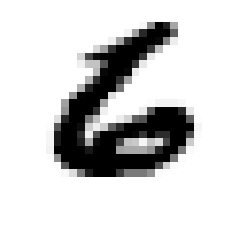

In [29]:
digit = X[69999].reshape(28,28)
plt.imshow(digit, cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [30]:
sgd.decision_function([X[69999]])

array([137573.78124818])

In [31]:
from sklearn.metrics import precision_recall_curve
scores = cross_val_predict(sgd, X_train, y_train_6, method = 'decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_6, scores)

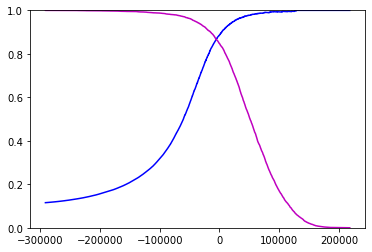

In [32]:
plt.plot(thresholds, precisions[:-1], 'b-', label = 'Precision')
plt.plot(thresholds, recalls[:-1], 'm-', label = 'Recalls')
plt.ylim([0, 1])
plt.show()

(0.0, 1.0, 0.0, 1.0)

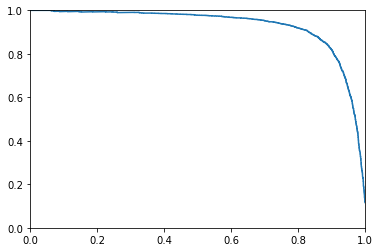

In [33]:
plt.plot(recalls,precisions)
plt.axis([0, 1, 0, 1])

In [34]:
t = [i for i, x in enumerate(recalls > .8) if x]

In [35]:
op_rec = recalls[t[len(t)-1]]
print('r ' + str(op_rec))
op_pr = precisions[t[len(t)-1]]
print('p ' + str(op_pr))
op_thr = thresholds[t[len(t)-1]]
print('t ' + str(op_thr))

r 0.8001013856032443
p 0.9190605590062112
t 10054.841559857547


In [36]:
y_train_pred_80 = (scores > op_thr)

In [37]:
precision_score(y_train_6, y_train_pred_80)

0.9190448456610367

In [38]:
recall_score(y_train_6, y_train_pred_80)

0.7999324095978371

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_6, scores)

(0.0, 1.0, 0.0, 1.0)

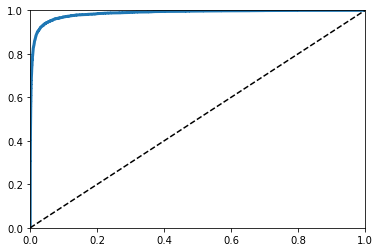

In [40]:
plt.plot(fpr, tpr, linewidth = 3)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_6, scores)

0.9863093816995432

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
probabilities = cross_val_predict(clf, X_train, y_train_6, method = 'predict_proba')
forest_scores = probabilities[:, 1]

KeyboardInterrupt: 

In [ ]:
fpr_f, tpr_f, threshols_f = roc_curve(y_train_6, forest_scores)

In [ ]:
plt.plot(fpr, tpr, 'r:', linewidth = 3, label = 'SGD')
plt.plot(fpr_f, tpr_f, linewidth = 3, label = 'Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])

In [ ]:
roc_auc_score(y_train_6, forest_scores)

In [ ]:
sgd.fit(X_train, y_train)

In [ ]:
sgd.predict([X[32]])

In [ ]:
sgd.decision_function([X[140]])

In [ ]:
sgd.predict([X[140]])

In [ ]:
digit = X[140].reshape(28,28)
plt.imshow(digit, cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [ ]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(SGDClassifier())

In [ ]:
ovo.fit(X_train, y_train)

In [ ]:
ovo.predict([X[130]])

In [ ]:
len(ovo.estimators_)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
clf.predict([X[130]])

In [ ]:
clf.predict_proba([X[130]])

In [43]:
cross_val_score(sgd, X_train, y_train, scoring = 'accuracy')

array([0.83091667, 0.87975   , 0.87741667, 0.86866667, 0.86166667])

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train.astype(np.float64))

In [45]:
cross_val_score(sgd, X_train_s, y_train, scoring = "accuracy", cv = 3)

array([0.9128, 0.9095, 0.9111])

In [46]:
y_train_pred = cross_val_predict(sgd, X_train_s, y_train)

In [47]:
confusion = confusion_matrix(y_train, y_train_pred)

In [48]:
confusion

array([[5720,    2,   22,    8,   13,   50,   43,    6,   54,    5],
       [   1, 6488,   41,   25,    5,   45,    6,    8,  109,   14],
       [  45,   35, 5356,   94,   78,   22,   83,   48,  183,   14],
       [  40,   36,  135, 5343,    2,  236,   32,   53,  161,   93],
       [  17,   22,   41,   11, 5358,    9,   53,   28,   95,  208],
       [  60,   37,   36,  177,   70, 4615,   97,   23,  210,   96],
       [  33,   24,   50,    3,   37,   85, 5622,    7,   56,    1],
       [  20,   19,   72,   33,   52,    9,    6, 5800,   23,  231],
       [  36,  126,   64,  132,    9,  152,   47,   19, 5152,  114],
       [  38,   31,   30,   82,  140,   38,    3,  186,  102, 5299]])

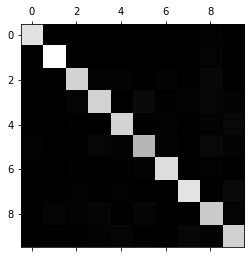

In [49]:
plt.matshow(confusion, cmap = 'gray')
plt.show()

In [50]:
row_sum = confusion.sum(axis = 1, keepdims = True)

In [51]:
norm_c = confusion/row_sum

In [52]:
np.fill_diagonal(norm_c, 0)

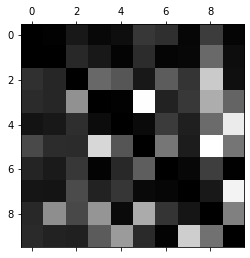

In [53]:
plt.matshow(norm_c, cmap = plt.cm.gray)
plt.show()

NameError: name 'save_fig' is not defined

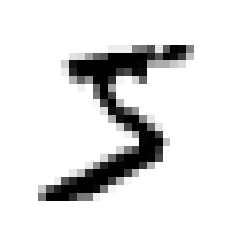

In [54]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [55]:
y = y.astype(np.uint8)

In [56]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

NameError: name 'save_fig' is not defined

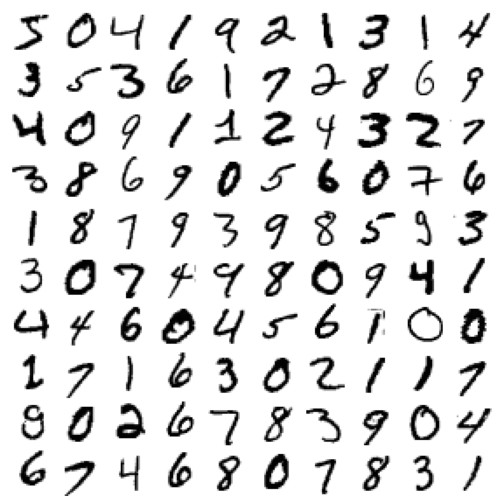

In [57]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

NameError: name 'save_fig' is not defined

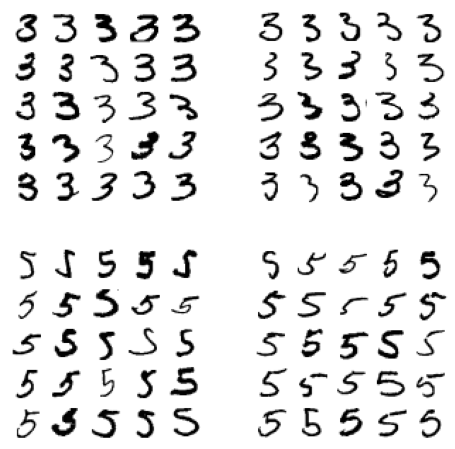

In [58]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

In [59]:
eta = 0.1 #learning rate
n_iterations = 1000 
m = 100 #no.feature pnts

In [60]:
theta = np.random.randn(2, 1)

In [61]:
for iteration in range(n_iterations):
    gradients = (2/m)*X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

NameError: name 'X_b' is not defined

In [62]:
theta

array([[ 0.01867213],
       [-0.31256173]])

In [63]:
def plot_gradient_decent(theta, eta):
        m = len(X_b)
        plt.plot(X, y, 'b.')
        n_iteration = 1000
        for iterations in range(n_iterations):
            if iteration < 10:
                y_predict = X_new_b.dot(theta)
                style = 'b-' if iteration > 0 else 'r--'
                plt.plot(X_new, y_predict, style)
            gradients = (2/m)*X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - eta*gradients
        plt.xlabel('$x_1$', fontsize = 18)
        plt.title(r'$/eta = {}$'.format(eta), fontsize = 18)

NameError: name 'X_b' is not defined

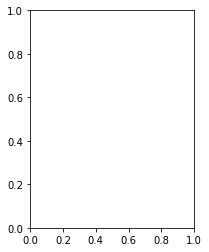

In [64]:
theta = np.random.randn(2,1)
plt.figure(figsize = (10,4))
plt.subplot(131);
plot_gradient_decent(theta, eta = 0.2)